In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('adult.csv')

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
num_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

cat_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
            

In [5]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

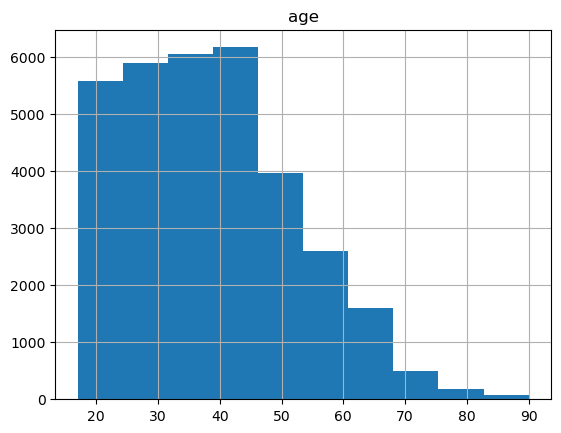

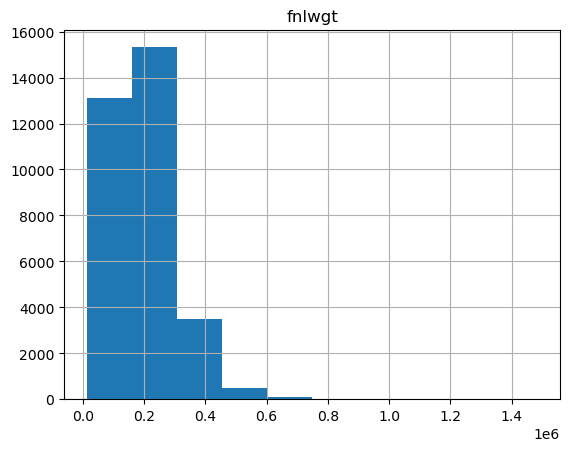

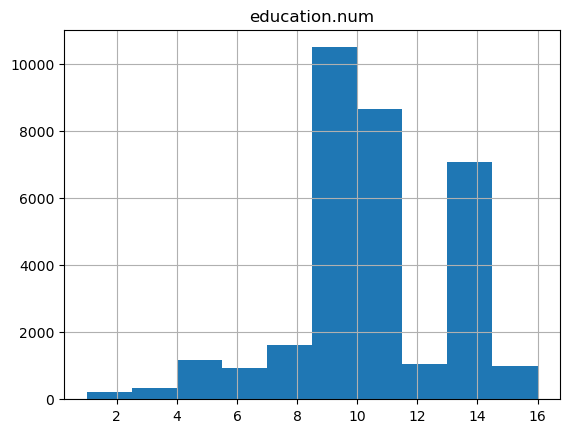

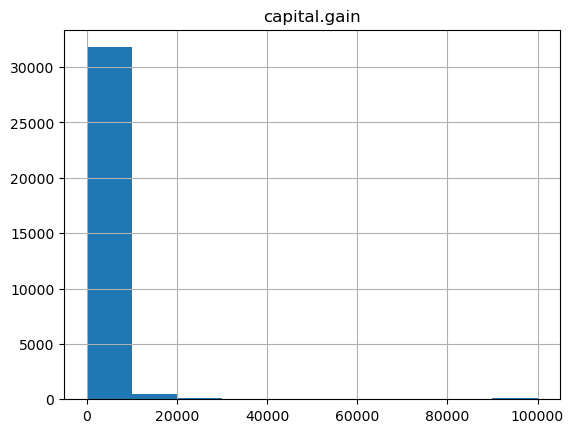

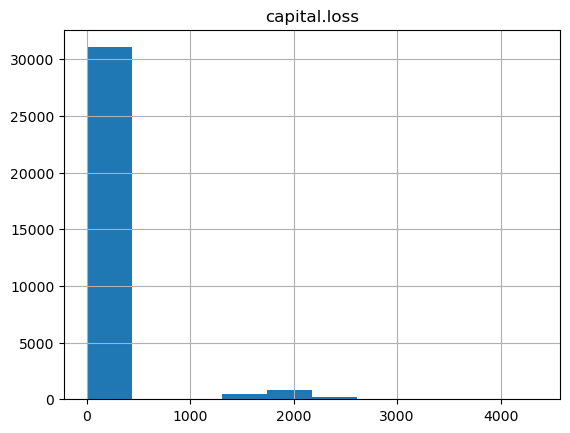

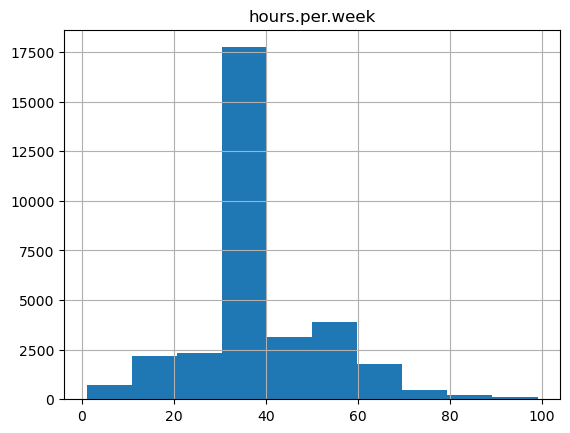

In [6]:
for i in num_cols:
    df[i].hist()
    plt.title(i)
    plt.show()

In [7]:


#df['hours.per.week'] = np.log1p(df['hours.per.week'])








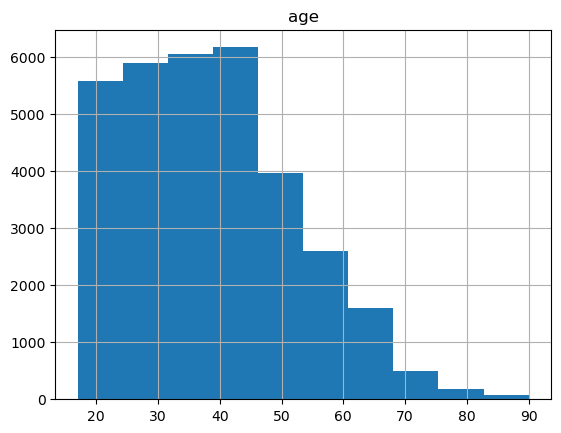

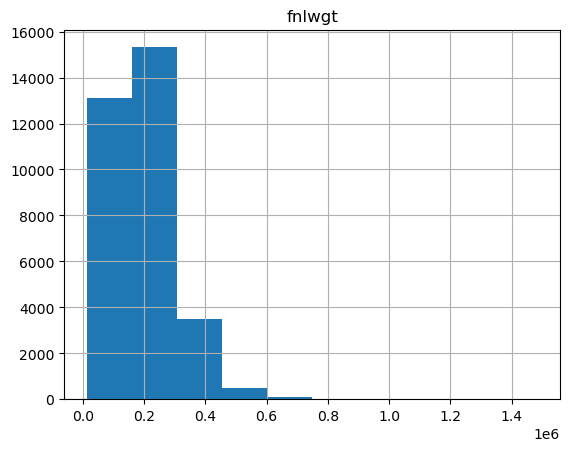

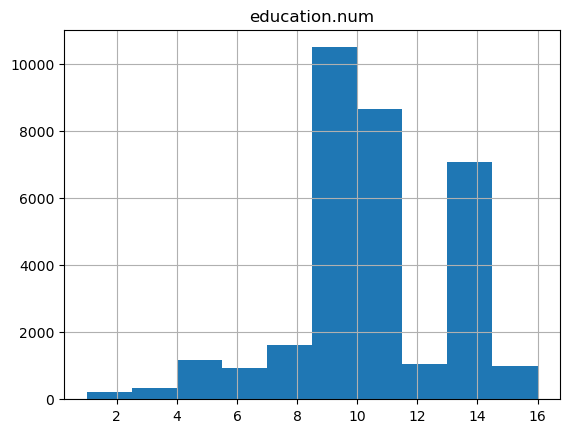

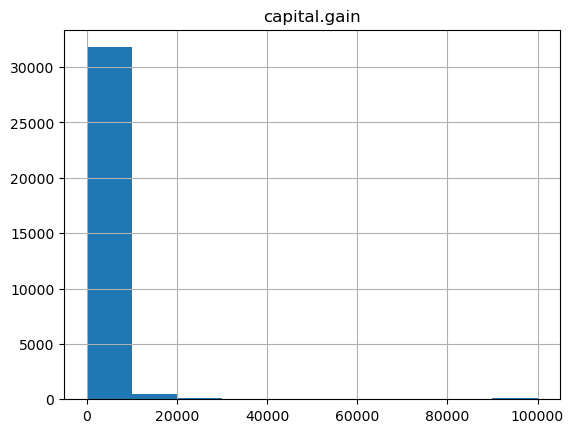

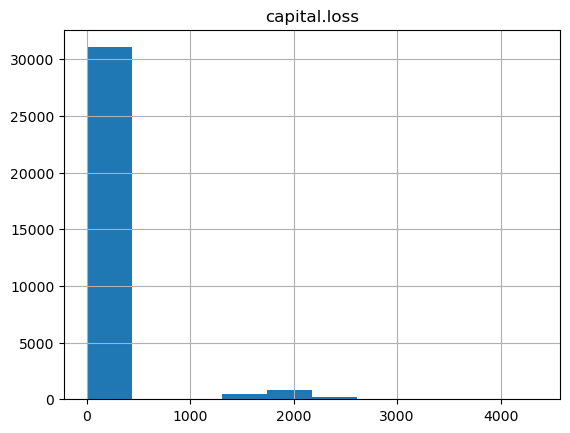

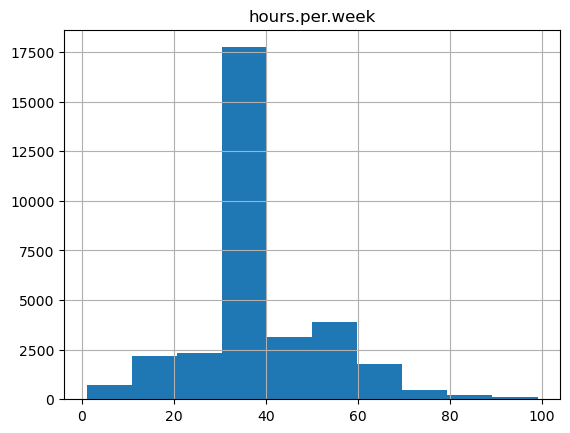

In [8]:
for i in num_cols:
    df[i].hist()
    plt.title(i)
    plt.show()

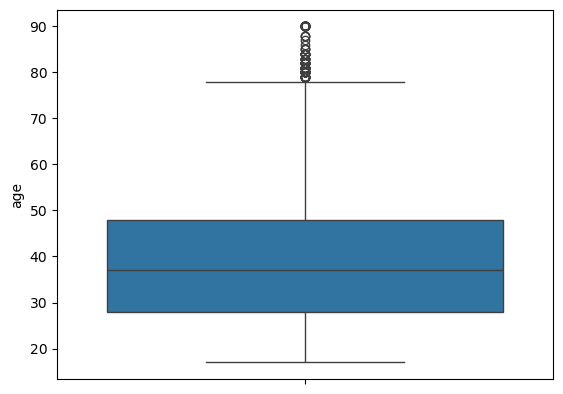

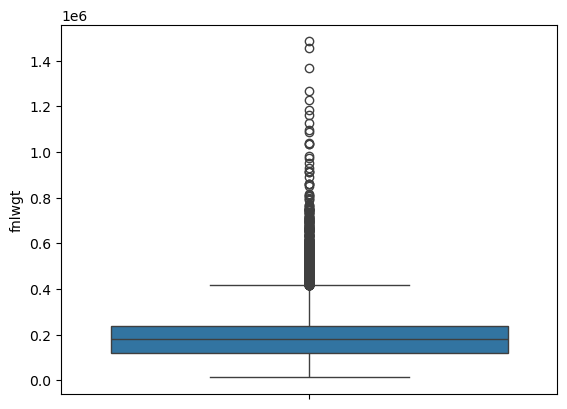

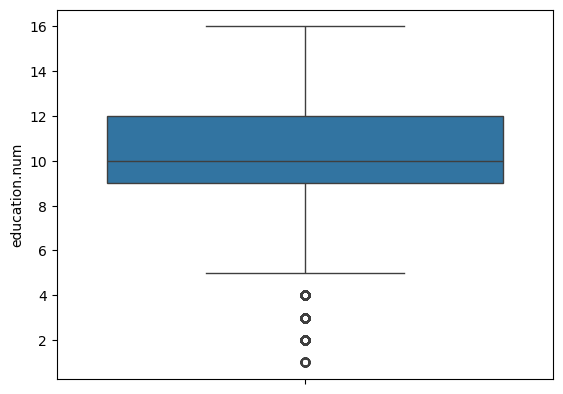

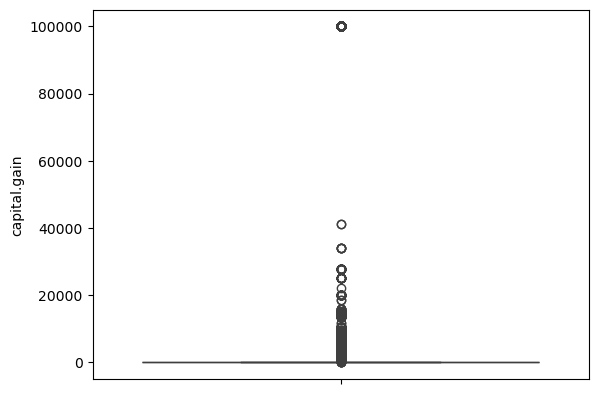

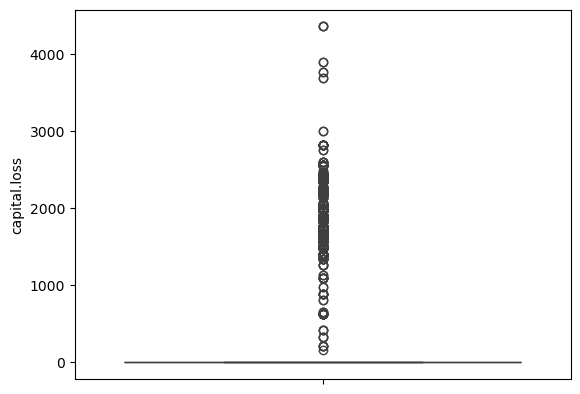

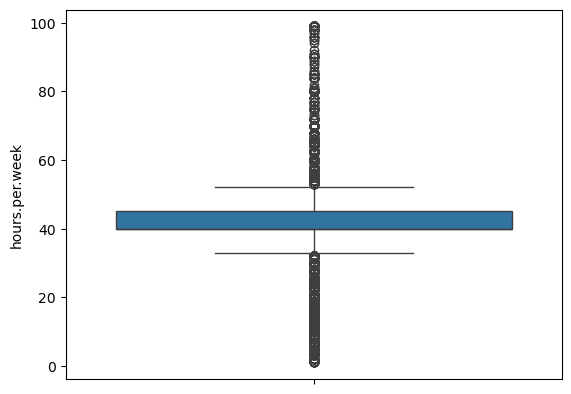

In [9]:
for i in num_cols:
    sns.boxplot(y=df[i])
    plt.show()

In [10]:
# Keep rows where hours.per.week <= 95
df = df[df['hours.per.week'] <= 90].reset_index(drop=True)


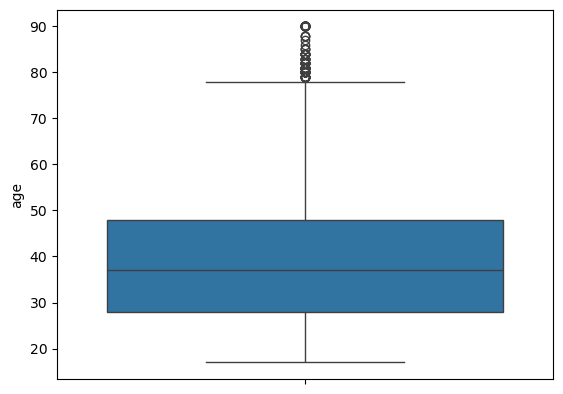

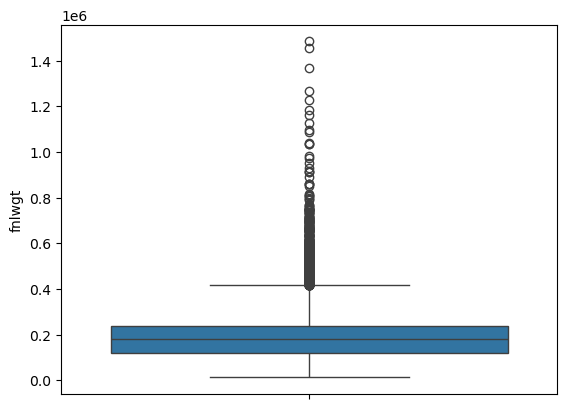

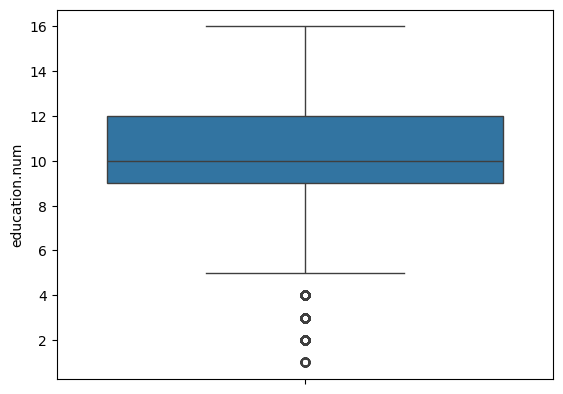

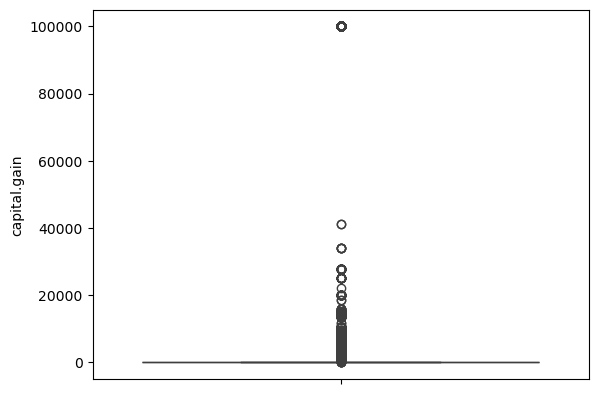

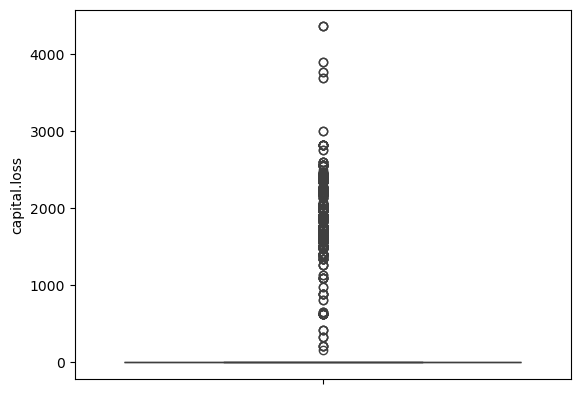

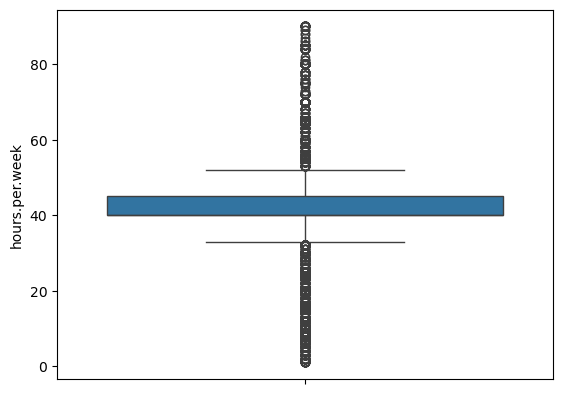

In [11]:
# Keep rows where hours.per.week <= 95

for i in num_cols:
    sns.boxplot(y=df[i])
    plt.show()

In [12]:
num_df = df[num_cols]




In [13]:
df.workclass.value_counts()

df = df.join(pd.get_dummies(df.workclass, prefix='workclass')).drop('workclass', axis=1)

In [14]:
df = df.join(pd.get_dummies(df.education, prefix='education')).drop('education', axis=1)

In [15]:
df = df.join(pd.get_dummies(df['marital.status'], prefix='maritalstatus')).drop('marital.status', axis=1)

In [16]:
df.occupation.value_counts()

df = df.join(pd.get_dummies(df.occupation, prefix='occupation')).drop('occupation', axis=1)

In [17]:
df = df.join(pd.get_dummies(df.relationship, prefix='relationship')).drop('relationship', axis=1)

In [18]:
df = df.join(pd.get_dummies(df.race, prefix='race')).drop('race', axis=1)

In [19]:
#sex

In [20]:
df = df.join(pd.get_dummies(df['native.country'], prefix='country')).drop('native.country', axis=1)

In [21]:
df['sex'] = df['sex'].apply( lambda x : 1 if x == 'Male' else 0)

df['income'] = df['income'].apply( lambda x : 1 if x == '<=50K' else 0)

In [22]:
df.head()

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass_?,workclass_Federal-gov,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,90,77053,9,0,0,4356,40,1,True,False,...,False,False,False,False,False,False,False,True,False,False
1,82,132870,9,0,0,4356,18,1,False,False,...,False,False,False,False,False,False,False,True,False,False
2,66,186061,10,0,0,4356,40,1,True,False,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,0,3900,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,0,3900,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False


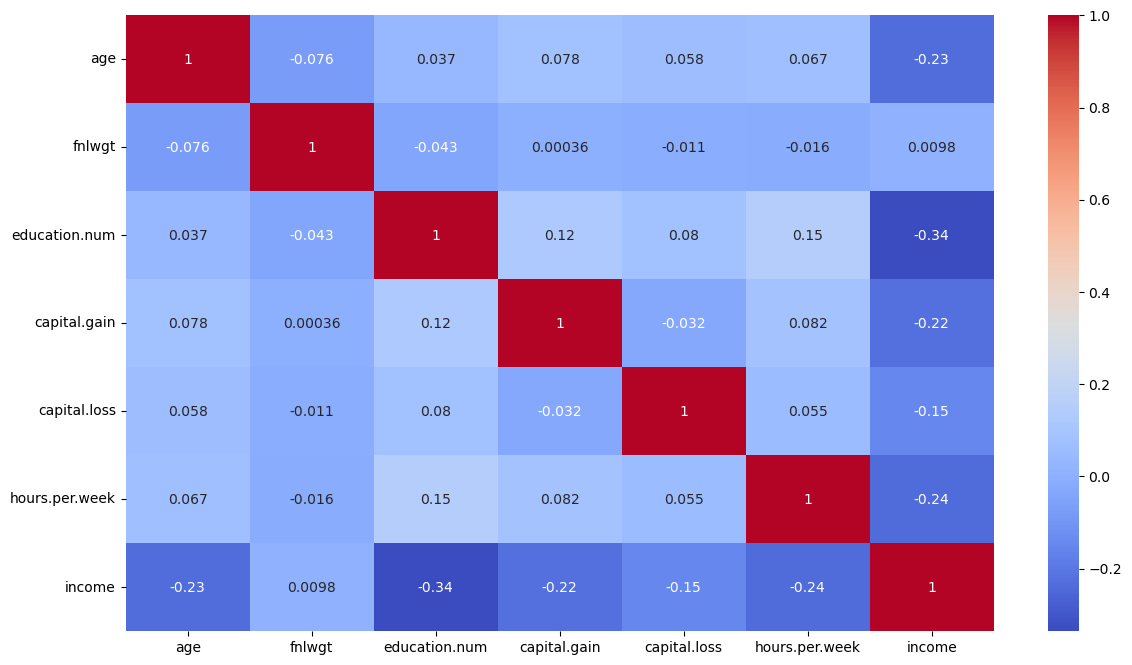

In [23]:
kum_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']

jum_df = df[kum_cols]

plt.figure(figsize=(14,8))
sns.heatmap(jum_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [24]:
df.head()

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass_?,workclass_Federal-gov,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,90,77053,9,0,0,4356,40,1,True,False,...,False,False,False,False,False,False,False,True,False,False
1,82,132870,9,0,0,4356,18,1,False,False,...,False,False,False,False,False,False,False,True,False,False
2,66,186061,10,0,0,4356,40,1,True,False,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,0,3900,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,0,3900,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False


In [25]:
df['Totalinvestment'] = df['capital.gain'] + df['capital.loss']


In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)



In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)



svm = LinearSVC(max_iter=5000)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)


print('classification report', classification_report(y_test, y_pred))





classification report               precision    recall  f1-score   support

           0       0.74      0.58      0.65      1573
           1       0.87      0.93      0.90      4918

    accuracy                           0.85      6491
   macro avg       0.81      0.76      0.78      6491
weighted avg       0.84      0.85      0.84      6491



In [37]:


import xgboost as xgb

model = xgb.XGBClassifier(
    n_estimators = 200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

predict = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predict))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predict))
print("\nClassification Report:\n", classification_report(y_test, predict))

Accuracy: 0.8722847018949315

Confusion Matrix:
 [[1017  556]
 [ 273 4645]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.71      1573
           1       0.89      0.94      0.92      4918

    accuracy                           0.87      6491
   macro avg       0.84      0.80      0.81      6491
weighted avg       0.87      0.87      0.87      6491

